***HPAI USA Forecast from May to July 31, 2024.***
-Saicharan Ritwik Chinni, 17 July 2024

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/My Drive/Forecasting Datasets/A Table by Confirmation Date_data.csv'
data=pd.read_csv(file_path)
data.head()

,Confirmed,State,County Name,Special Id,Production,Control Area Released,Measure Names,Birds Affected
0,2/8/2022,Indiana,Dubois,Dubois 01,Commercial Turkey Meat Bird,23-Mar-22,Birds Affected,"29,000"
1,2/12/2022,Kentucky,Fulton,Fulton 01,Commercial Broiler Production,15-Mar-22,Birds Affected,"231,400"
2,2/12/2022,Virginia,Fauquier,Fauquier 01,WOAH Non-Poultry,27-Feb-22,Birds Affected,90
3,2/15/2022,Kentucky,Webster,Webster 01,Commercial Turkey Meat Bird,12-Mar-22,Birds Affected,"53,300"
4,2/16/2022,Indiana,Dubois,Dubois 02,Commercial Turkey Meat Bird,23-Mar-22,Birds Affected,"26,600"


In [3]:
data['Confirmed'] = pd.to_datetime(data['Confirmed'])
# Used stackoverflow for correcting the error coming in the below line.
data['Birds Affected'] = data['Birds Affected'].astype(str).str.replace(',', '').astype(int)
daily_cases = data.groupby('Confirmed')['Birds Affected'].sum().reset_index()

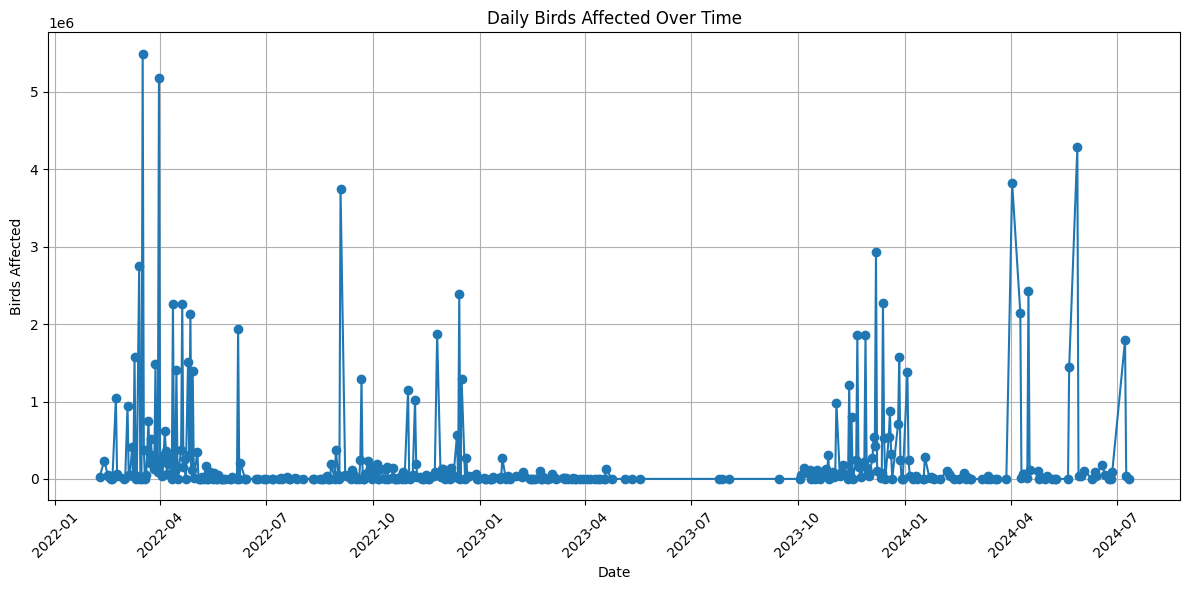

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(daily_cases['Confirmed'], daily_cases['Birds Affected'], marker='o')
plt.title('Daily Birds Affected Over Time')
plt.xlabel('Date')
plt.ylabel('Birds Affected')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Seasonality**

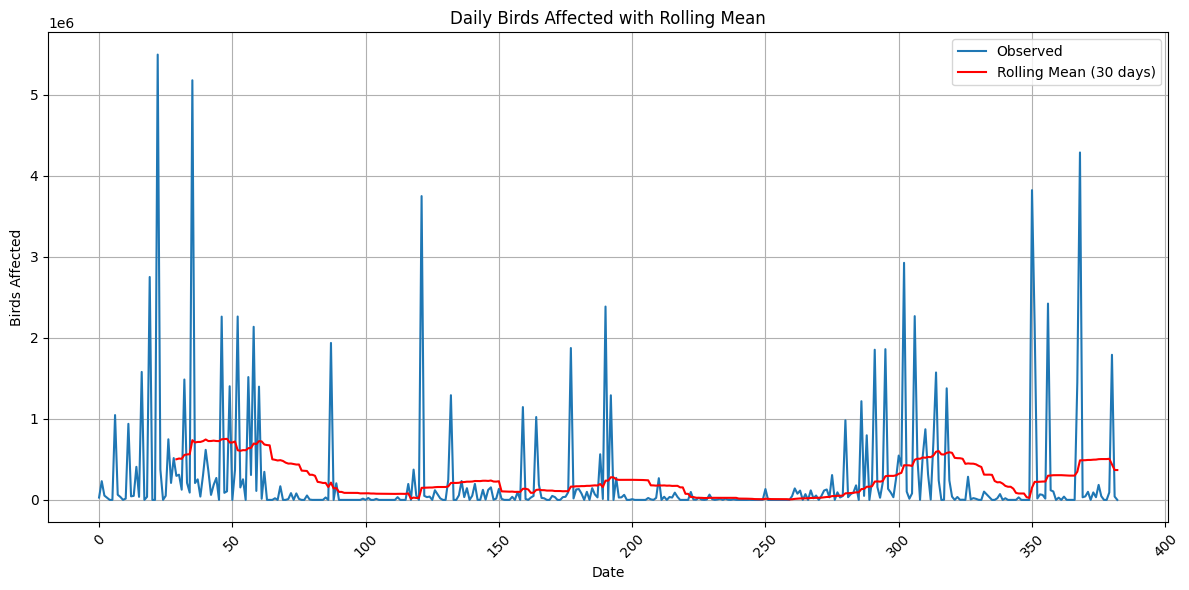

In [5]:
# Calculate and plot the rolling mean to observe trends
daily_cases['Rolling Mean'] = daily_cases['Birds Affected'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases['Birds Affected'], label='Observed')
plt.plot(daily_cases.index, daily_cases['Rolling Mean'], label='Rolling Mean (30 days)', color='red')
plt.title('Daily Birds Affected with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Birds Affected')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Forecasting**

In [8]:
daily_data = data.set_index('Confirmed').resample('D').sum().fillna(0)
model = ExponentialSmoothing(daily_data['Birds Affected'], trend='add', seasonal='add', seasonal_periods=7).fit()
forecast_period = pd.date_range(start=daily_data.index[-1], end='2024-07-31', freq='D')
forecast = model.forecast(len(forecast_period))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [9]:
forecast_period = pd.date_range(start=daily_data.index[-1], end='2024-07-31', freq='D')
forecast = model.forecast(len(forecast_period))

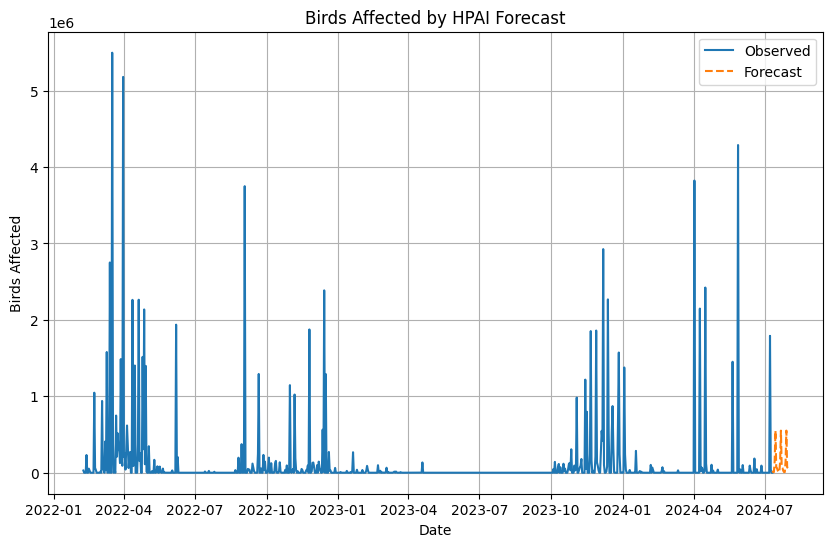

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data['Birds Affected'], label='Observed')
plt.plot(forecast_period, forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Birds Affected')
plt.title('Birds Affected by HPAI Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
total_forecasted_birds_affected = daily_data['Birds Affected'].sum() + forecast.sum()
total_forecasted_birds_affected

101711868.66195789

# **Forecast plot for May to July**

In [13]:
start_date = '2024-05-01'
end_date = '2024-07-31'
filtered_data = data[(data['Confirmed'] >= start_date) & (data['Confirmed'] <= end_date)]
filtered_data['Birds Affected'] = filtered_data['Birds Affected'].astype(str).str.replace(',', '').astype(int)
total_birds_affected = filtered_data['Birds Affected'].sum()
total_birds_affected

<ipython-input-13-a352d89167f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Birds Affected'] = filtered_data['Birds Affected'].astype(str).str.replace(',', '').astype(int)


8239840

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


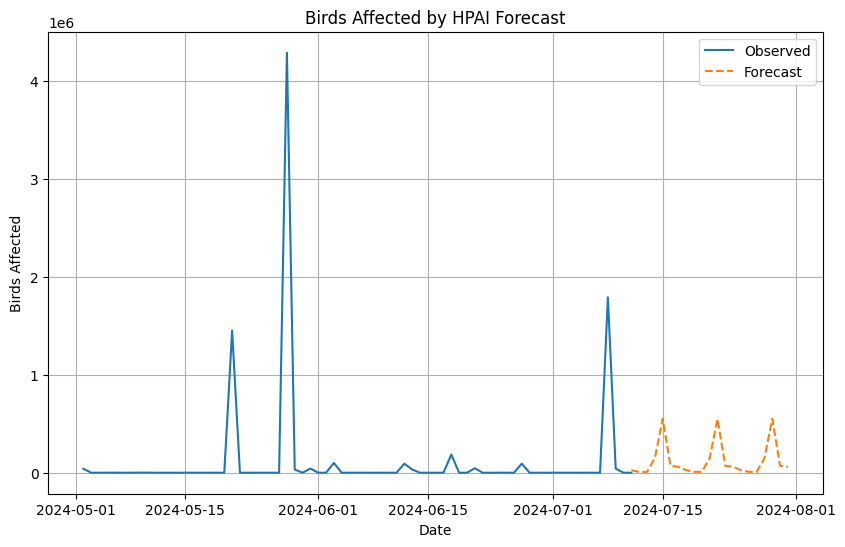

In [14]:
daily_databet = filtered_data.set_index('Confirmed').resample('D').sum().fillna(0)
modelbet = ExponentialSmoothing(daily_databet['Birds Affected'], trend='add', seasonal='add', seasonal_periods=7).fit()
forecast_period1 = pd.date_range(start=daily_databet.index[-1], end='2024-07-31', freq='D')
forecast1 = model.forecast(len(forecast_period1))
plt.figure(figsize=(10, 6))
plt.plot(daily_databet['Birds Affected'], label='Observed')
plt.plot(forecast_period1, forecast1, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Birds Affected')
plt.title('Birds Affected by HPAI Forecast')
plt.legend()
plt.grid(True)
plt.show()